In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [1]:
import json
import pandas as pd
import os

# 데이터분석

## skeleton

In [2]:
DATA_FILE = "/gdrive/MyDrive/Colab Notebooks/ssafy/data/data.json"
DUMP_FILE = "/gdrive/MyDrive/Colab Notebooks/ssafy/data/dump.pkl"

store_columns = (
    "id",  # 음식점 고유번호
    "store_name",  # 음식점 이름
    "branch",  # 음식점 지점 여부
    "area",  # 음식점 위치
    "tel",  # 음식점 번호
    "address",  # 음식점 주소
    "latitude",  # 음식점 위도
    "longitude",  # 음식점 경도
    "category",  # 음식점 카테고리
)

review_columns = (
    "id",  # 리뷰 고유번호
    "store",  # 음식점 고유번호
    "user",  # 유저 고유번호
    "score",  # 평점
    "content",  # 리뷰 내용
    "reg_time",  # 리뷰 등록 시간
)

menu_columns = (
    "id",
    "store",
    "menu_name",
    "price",
)

user_columns = (
    "id",
    "gender",
    "age",
)


def import_data(data_path=DATA_FILE):
    try:
        with open(data_path, encoding="utf-8") as f:
            data = json.loads(f.read())
    except FileNotFoundError as e:
        print(f"`{data_path}` 가 존재하지 않습니다.")
        exit(1)

    stores = []  # 음식점 테이블
    reviews = []  # 리뷰 테이블
    menus = [] # 메뉴 테이블
    users = [] # 유저 테이블
    menu_id = 0

    for d in data:
        categories = [c["category"] for c in d["category_list"]]
        stores.append(
            [
                d["id"],
                d["name"],
                d["branch"],
                d["area"],
                d["tel"],
                d["address"],
                d["latitude"],
                d["longitude"],
                "|".join(categories),
            ]
        )

        for review in d["review_list"]:
            r = review["review_info"]
            u = review["writer_info"]
            user_age = 2021 - int(u["born_year"]) + 1

            reviews.append(
                [r["id"], d["id"], u["id"], r["score"], r["content"], r["reg_time"]]
            )
            users.append(
                [u["id"], u["gender"], user_age]
            )

        for menu in d["menu_list"]:
            menus.append(
                [menu_id, d["id"], menu["menu"], menu["price"]]
            )
            menu_id +=1

    store_frame = pd.DataFrame(data=stores, columns=store_columns)
    review_frame = pd.DataFrame(data=reviews, columns=review_columns)
    memu_frame = pd.DataFrame(data=menus, columns=menu_columns)
    user_frame = pd.DataFrame(data=users, columns=user_columns)

    return {"stores": store_frame, "reviews": review_frame, "menus": memu_frame, "users":user_frame}


def dump_dataframes(dataframes):
    pd.to_pickle(dataframes, DUMP_FILE)


def load_dataframes():
    return pd.read_pickle(DUMP_FILE)


print("[*] Parsing data...")
raw_data = import_data()
print("[+] Done")

print("[*] Dumping data...")
dump_dataframes(raw_data)
print("[+] Done\n")

raw_data = load_dataframes()

[*] Parsing data...
[+] Done
[*] Dumping data...
[+] Done



In [ ]:
print(raw_data["stores"].head())
# print(data["reviews"].head())
# print(data["users"].head())

   id     store_name branch  ...   latitude   longitude   category
0   1           Agal   None  ...  37.556862  126.926666   아구찜|포장마차
1   2         Assisy   None  ...  35.150746  126.890062         카페
2   3  Battered Sole   None  ...  37.535032  126.991664    피쉬앤칩스|펍
3   4      Chakyoung   None  ...  35.158587  129.175004  레스토랑|카프레제
4   5       Delabobo   None  ...  37.559904  126.840512  디저트카페|디저트

[5 rows x 9 columns]


In [ ]:
raw_data["reviews"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91398 entries, 0 to 91397
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        91398 non-null  int64 
 1   store     91398 non-null  int64 
 2   user      91398 non-null  int64 
 3   score     91398 non-null  int64 
 4   content   91398 non-null  object
 5   reg_time  91398 non-null  object
dtypes: int64(4), object(2)
memory usage: 4.2+ MB


In [ ]:
raw_data["reviews"].describe()

,id,store,user,score
count,91398.000000,91398.000000,91398.000000,91398.000000
mean,8328.450557,184286.576927,324560.215782,3.846605
std,5117.389131,101038.387563,255908.402479,1.109838
min,1.000000,15.000000,7.000000,0.000000
25%,3912.250000,100178.000000,127124.000000,3.000000
50%,8039.000000,187034.500000,255093.000000,4.000000
75%,12824.000000,269498.000000,469245.000000,5.000000
max,20359.000000,360515.000000,950331.000000,5.000000


## 무슬림친화레스토랑

In [3]:
MUSLIM_PATH = '/gdrive/MyDrive/Colab Notebooks/ssafy/data/무슬림친화레스토랑.csv'
CSV_MUSLIM_PATH = pd.read_csv(MUSLIM_PATH, engine='python', encoding='cp949')
print(CSV_MUSLIM_PATH.head())

        레스토랑명     무슬림친화도  지역  ...      휴일 주차                관광지
0       우스마니아  무슬림 자가 인증  서울  ...     NaN  X  국립중앙박물관, 이태원 쇼핑거리
1   미스터케밥 2호점   할랄 공식 인증  서울  ...     NaN  X  국립중앙박물관, 이태원 쇼핑거리
2       카파도키아  무슬림 자가 인증  부산  ...    연중무휴  O                범어사
3     올리브레스토랑  무슬림 자가 인증  인천  ...     NaN  O            송도센트럴파크
4  봄베이인도요리전문점   무슬림 프렌들리  경남  ...  매주 월요일  O          창원시립마산박물관

[5 rows x 10 columns]


In [10]:
CSV_MUSLIM_PATH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   레스토랑명   347 non-null    object
 1   무슬림친화도  347 non-null    object
 2   지역      347 non-null    object
 3   음식분류    288 non-null    object
 4   주소      347 non-null    object
 5   연락처     347 non-null    object
 6   영업시간    347 non-null    object
 7   휴일      224 non-null    object
 8   주차      347 non-null    object
 9   관광지     347 non-null    object
dtypes: object(10)
memory usage: 27.2+ KB


## 기초통계

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 160998 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [12]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = " + fontInfo.fname)

NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareL.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEco.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareEB.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf
NanumSquareRound = /us

In [13]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

무슬림친화도 분포

In [5]:
df = CSV_MUSLIM_PATH["무슬림친화도"].value_counts().rename_axis('무슬림친화도').reset_index(name='cnt')
df

,무슬림친화도,cnt
0,무슬림 프렌들리,233
1,포크프리,69
2,무슬림 자가 인증,32
3,할랄 공식 인증,13


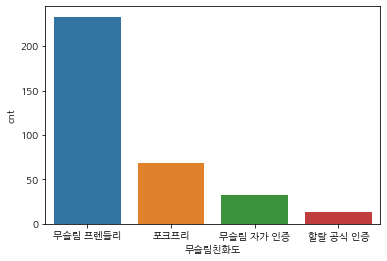

In [14]:
sns.barplot(
    data= df,
    x= "무슬림친화도",
    y= "cnt"
)
plt.show()

지역 데이터

In [15]:
df_r = CSV_MUSLIM_PATH["지역"].value_counts().rename_axis('지역').reset_index(name='cnt')
df_r

,지역,cnt
0,서울,135
1,경기,46
2,부산,30
3,강원,26
4,제주,23
5,대구,19
6,전북,12
7,경북,12
8,인천,11
9,경남,10


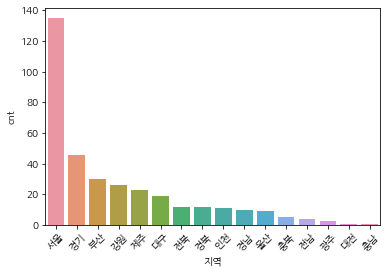

In [45]:
sns.barplot(
    data= df_r,
    x= "지역",
    y= "cnt"
)
plt.xticks(rotation=45)
plt.show()

음식분류

In [35]:
data_mus = CSV_MUSLIM_PATH.copy()

In [36]:
data_mus["음식분류"].replace("한식(사찰음식)","한식",inplace=True)

In [38]:
data_mus["음식분류"].replace("양식(룸서비스)","양식",inplace=True)
data_mus["음식분류"].replace("뷔페식,한식","한식",inplace=True)

In [40]:
data_mus["음식분류"].replace("중동식","아랍음식",inplace=True)
data_mus["음식분류"].replace("우즈베키스탄음식,러시아음식","러시아음식",inplace=True)
data_mus["음식분류"].replace("이집트음식,아랍음식","아랍음식",inplace=True)
data_mus["음식분류"].replace("한식,인도음식","인도음식",inplace=True)
data_mus["음식분류"].replace("양식,한식","양식",inplace=True)
data_mus["음식분류"].replace("일식,한식","일식",inplace=True)


In [42]:
data_mus["음식분류"].replace("인도음식,네팔음식","네팔음식",inplace=True)

In [43]:
df_c = data_mus["음식분류"].value_counts().rename_axis('음식분류').reset_index(name='cnt')
df_c

,음식분류,cnt
0,한식,141
1,인도음식,47
2,네팔음식,17
3,양식,16
4,일식,14
5,뷔페식,12
6,터키음식,11
7,아시아음식,8
8,아랍음식,5
9,파키스탄음식,3


Store_name 최대 글자 길이

In [ ]:
max(raw_data['stores'].store_name.map(lambda x: len(x)).max(), CSV_MUSLIM_PATH['레스토랑명'].map(lambda x: len(x)).max())

30

MUSLIM_FRIENDLY 최대 길이

In [ ]:
CSV_MUSLIM_PATH["무슬림친화도"].map(lambda x: len(x)).max()

9

무슬림레스토랑 지역 종류 및 빈도수

In [ ]:
CSV_MUSLIM_PATH['지역'].value_counts()

서울    135
경기     46
부산     30
강원     26
제주     23
대구     19
전북     12
경북     12
인천     11
경남     10
울산      9
충북      5
전남      4
광주      3
대전      1
충남      1
Name: 지역, dtype: int64

주소 최대 길이

In [ ]:
# print(raw_data['stores']['address'].map(lambda x: len(x)).max())
print(CSV_MUSLIM_PATH['주소'].map(lambda x: len(x)).max())

46


## merge : skeleton + 무슬림레스토랑


In [ ]:
store_table = raw_data["stores"].copy()
muslim_table = CSV_MUSLIM_PATH.copy()

In [ ]:
# store_table['full_store_name'] = store_table[['store_name', 'branch']].apply(' '.join, axis=1)
# store_table['full_store_name'] = store_table["store_name"] + " " + store_table["branch"]

In [ ]:
print(store_table.head())

   id     store_name branch  ...   latitude   longitude   category
0   1           Agal   None  ...  37.556862  126.926666   아구찜|포장마차
1   2         Assisy   None  ...  35.150746  126.890062         카페
2   3  Battered Sole   None  ...  37.535032  126.991664    피쉬앤칩스|펍
3   4      Chakyoung   None  ...  35.158587  129.175004  레스토랑|카프레제
4   5       Delabobo   None  ...  37.559904  126.840512  디저트카페|디저트

[5 rows x 9 columns]


In [ ]:
store_table.drop_duplicates()

,id,store_name,branch,area,tel,address,latitude,longitude,category
0,1,Agal,None,홍대,010-6689-5886,서울특별시 마포구 동교동 170-13,37.556862,126.926666,아구찜|포장마차
1,2,Assisy,None,광주,062-367-0700,광주광역시 서구 농성동 631-33,35.150746,126.890062,카페
2,3,Battered Sole,None,이태원,02-749-6867,서울특별시 용산구 이태원동 118-9,37.535032,126.991664,피쉬앤칩스|펍
3,4,Chakyoung,None,달맞이길,051-756-5566,부산광역시 해운대구 중2동 1509-5,35.158587,129.175004,레스토랑|카프레제
4,5,Delabobo,None,발산역,02-2667-9854,서울특별시 강서구 등촌동 689,37.559904,126.840512,디저트카페|디저트
...,...,...,...,...,...,...,...,...,...
459983,459996,행복부대찌개,None,녹양동,031-877-2410,경기도 의정부시 녹양동 154-6,37.757939,127.032758,
459984,459997,행복부페,None,안중읍,031-682-1733,경기도 평택시 안중읍 용성리 718-3,37.002743,126.944991,
459985,459998,행복분식,None,퇴촌면,031-8071-2668,경기도 광주 퇴촌면 도수리 611-6,37.471677,127.315744,
459986,459999,행복분식,None,소주동,055-312-3713,경상남도 양산시 소주동 147-1,35.407860,129.158564,


In [ ]:
store_table.columns

Index(['id', 'store_name', 'branch', 'area', 'tel', 'address', 'latitude',
       'longitude', 'category'],
      dtype='object')

In [ ]:
muslim_table.columns = ['store_name', 'muslim_friendly', 'location_region', 'food_category', 'address', 'tel', 'working_time', 'days_closed','parking','tourism']
muslim_table.head()

,store_name,muslim_friendly,location_region,food_category,address,tel,working_time,days_closed,parking,tourism
0,우스마니아,무슬림 자가 인증,서울,파키스탄음식,서울 용산구 우사단로 34,02-798-7155,11:00-22:00,NaN,X,"국립중앙박물관, 이태원 쇼핑거리"
1,미스터케밥 2호점,할랄 공식 인증,서울,터키음식,서울 용산구 우사단로 42,070-7532-1997,08:00-05:00,NaN,X,"국립중앙박물관, 이태원 쇼핑거리"
2,카파도키아,무슬림 자가 인증,부산,터키음식,부산 금정구 금단로 123-9,051-515-5981,11:30-22:00,연중무휴,O,범어사
3,올리브레스토랑,무슬림 자가 인증,인천,아랍음식,인천 연수구 옥련로 31,032-874-2800,10.30-22:00,NaN,O,송도센트럴파크
4,봄베이인도요리전문점,무슬림 프렌들리,경남,인도음식,경남 창원시 성산구 용지로 74,055-263-4111,"11:30-22:00(브레이크 타임 15:00-17:00, 주말에는 브레이크 타임 없음)",매주 월요일,O,창원시립마산박물관


### 가게 이름으로 묶기


In [ ]:
df_merge = pd.merge(muslim_table, store_table, on='store_name', how='left')
print(df_merge)

NameError: ignored

In [ ]:
df_merge.drop_duplicates("store_name", inplace=True)
print(df_merge.shape)

(345, 18)


In [ ]:
print(muslim_table.shape)

(347, 10)


#### 가게이름으로 기초통계

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 976
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_name       345 non-null    object 
 1   muslim_friendly  345 non-null    object 
 2   location_region  345 non-null    object 
 3   food_category    288 non-null    object 
 4   address_x        345 non-null    object 
 5   tel_x            345 non-null    object 
 6   working_time     345 non-null    object 
 7   days_closed      222 non-null    object 
 8   parking          345 non-null    object 
 9   tourism          345 non-null    object 
 10  id               141 non-null    float64
 11  branch           11 non-null     object 
 12  area             139 non-null    object 
 13  tel_y            140 non-null    object 
 14  address_y        141 non-null    object 
 15  latitude         141 non-null    object 
 16  longitude        141 non-null    object 
 17  category        

주소 교집합

In [ ]:
df_merge.columns

Index(['store_name', 'muslim_friendly', 'location_region', 'food_category',
       'address_x', 'tel_x', 'working_time', 'days_closed', 'parking',
       'tourism', 'id', 'branch', 'area', 'tel_y', 'address_y', 'latitude',
       'longitude', 'category'],
      dtype='object')

In [ ]:
df_merge[df_merge['address_x'] == df_merge['address_y']]

,store_name,muslim_friendly,location_region,food_category,address_x,tel_x,working_time,days_closed,parking,tourism,id,branch,area,tel_y,address_y,latitude,longitude,category


In [ ]:
df_merge[df_merge['tel_x'] == df_merge['tel_y']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 962
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_name       74 non-null     object 
 1   muslim_friendly  74 non-null     object 
 2   location_region  74 non-null     object 
 3   food_category    63 non-null     object 
 4   address_x        74 non-null     object 
 5   tel_x            74 non-null     object 
 6   working_time     74 non-null     object 
 7   days_closed      48 non-null     object 
 8   parking          74 non-null     object 
 9   tourism          74 non-null     object 
 10  id               74 non-null     float64
 11  branch           4 non-null      object 
 12  area             72 non-null     object 
 13  tel_y            74 non-null     object 
 14  address_y        74 non-null     object 
 15  latitude         74 non-null     object 
 16  longitude        74 non-null     object 
 17  category         

### 전화번호로 묶기

In [ ]:
# null 값 일 수도  있음
df_tel.drop_duplicates("tel").shape

(234, 18)

In [ ]:
df_tel= pd.merge(muslim_table, store_table, on='tel')
df_tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   store_name_x     244 non-null    object
 1   muslim_friendly  244 non-null    object
 2   location_region  244 non-null    object
 3   food_category    200 non-null    object
 4   address_x        244 non-null    object
 5   tel              244 non-null    object
 6   working_time     244 non-null    object
 7   days_closed      162 non-null    object
 8   parking          244 non-null    object
 9   tourism          244 non-null    object
 10  id               244 non-null    int64 
 11  store_name_y     244 non-null    object
 12  branch           32 non-null     object
 13  area             240 non-null    object
 14  address_y        244 non-null    object
 15  latitude         244 non-null    object
 16  longitude        244 non-null    object
 17  category         244 non-null    ob

## merge : review + user

In [ ]:
user_table = raw_data["users"].copy()
user_table.columns

Index(['id', 'gender', 'age'], dtype='object')

In [ ]:
review_table = raw_data["reviews"].copy()
review_table.columns

Index(['id', 'store', 'user', 'score', 'content', 'reg_time'], dtype='object')

In [ ]:
df_review_user = pd.merge(review_table, user_table, left_on='user', right_on='id')
df_review_user.drop_duplicates("content", inplace=True)
df_review_user.columns

Index(['id_x', 'store', 'user', 'score', 'content', 'reg_time', 'id_y',
       'gender', 'age'],
      dtype='object')

## merge: merged + reivew_merged

In [ ]:
df_merged = pd.merge(df_merge, df_review_user, left_on='id', right_on='store')
df_merged.shape

(113, 27)

In [ ]:
df_tel_merged = pd.merge(df_tel, df_review_user, left_on='id', right_on='store')
df_tel_merged.shape

(179, 27)

In [ ]:
df_tel_merged.head()

# 이미지 크롤링

## 최종 선택

In [ ]:
!pip install icrawler

  Created wheel for icrawler: filename=icrawler-0.6.4-py2.py3-none-any.whl size=35063 sha256=7f90da5c572aaf2d30bfd76754024a6bef81344a5f2c7d7c83da7f4e423d6fb2
  Stored in directory: /root/.cache/pip/wheels/57/f7/08/e89027083863374b83f7b3e3ce52a9afa1674424a379c7faf9
Successfully built icrawler


In [ ]:
import base64

from icrawler import ImageDownloader
from icrawler.builtin import GoogleImageCrawler
from six.moves.urllib.parse import urlparse


In [ ]:
def load_img(word, num, search_path):
    google_crawler = GoogleImageCrawler(
        feeder_threads=1,
        parser_threads=1,
        downloader_threads=4,
        storage={'root_dir': search_path})
    
    google_crawler.crawl(keyword='식당 '+word, offset=0, max_num=num, max_size=None, file_idx_offset=0)

In [ ]:
def load_store_img(df_list, num, search_path):
    length = len(df_list)
    for img in range(length):
        os.mkdir(search_path + str(img))
        dir_name = search_path + str(img) + '/'
        load_img(df_list[img], num, dir_name)

dir_path = '/gdrive/MyDrive/Colab Notebooks/ssafy/data/image/'
load_store_img(CSV_MUSLIM_PATH['레스토랑명'], 3, dir_path) 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2021-03-25 05:04:51,020 - INFO - icrawler.crawler - starting 4 downloader threads...
2021-03-25 05:04:51,450 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2021-03-25 05:04:51,451 - INFO - parser - thread parser-001 exit
2021-03-25 05:04:51,775 - INFO - parser - parsing result page https://www.google.com/search?q=%EC%8B%9D%EB%8B%B9+%EB%A0%88%EC%9D%B8%EB%B3%B4%EC%9A%B0&ijn=0&start=0&tbs=&tbm=isch
2021-03-25 05:04:51,865 - INFO - downloader - image #1	https://media-cdn.tripadvisor.com/media/photo-s/07/42/2e/03/rainbow-room.jpg
2021-03-25 05:04:51,944 - INFO - downloader - image #2	https://i.ytimg.com/vi/0fdfHdzar2I/hqdefault.jpg
2021-03-25 05:04:52,006 - INFO - downloader - image #3	https://i.ytimg.com/vi/46bgHDbTFWo/maxresdefault.jpg
2021-03-25 05:04:52,226 - INFO - downloader - downloaded images reach max num, thread downloader-004 is ready to exit
2021-03-25 05:04:52,227 - INFO - downloader - thread downloader

## 연습용

In [ ]:
class PrefixNameDownloader(ImageDownloader):
    txt = '선언해서'
    def get_filename(self,task, default_ext):
        filename = super(PrefixNameDownloader, self).get_filename(
            task, default_ext)
        return txt+ filename

In [ ]:

def load_image(word, num, search_path):
    txt = '고슴도치'
    google_crawler = GoogleImageCrawler(
        downloader_cls=PrefixNameDownloader,
        feeder_threads=1,
        parser_threads=1,
        downloader_threads=4,
        storage={'root_dir': search_path})

    google_crawler.crawl(keyword=word, max_num=num, max_size=None)

In [ ]:
search_path = '/gdrive/MyDrive/Colab Notebooks/ssafy/data/image/'
load_image("고슴도치", 2, search_path)

2021-03-24 08:09:17,486 - INFO - icrawler.crawler - start crawling...
2021-03-24 08:09:17,487 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-03-24 08:09:17,488 - INFO - feeder - thread feeder-001 exit
2021-03-24 08:09:17,488 - INFO - icrawler.crawler - starting 1 parser threads...
2021-03-24 08:09:17,492 - INFO - icrawler.crawler - starting 4 downloader threads...
2021-03-24 08:09:18,073 - INFO - parser - parsing result page https://www.google.com/search?q=%EA%B3%A0%EC%8A%B4%EB%8F%84%EC%B9%98&ijn=0&start=0&tbs=&tbm=isch
Exception in thread downloader-002:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/icrawler/downloader.py", line 275, in worker_exec
    max_num, default_ext, queue_timeout, req_timeout, **kwargs)
  File "/usr/local/lib/python3.7/di

In [ ]:
import base64

from icrawler import ImageDownloader
from icrawler.builtin import GoogleImageCrawler
from six.moves.urllib.parse import urlparse


class PrefixNameDownloader(ImageDownloader):

    def get_filename(self, task, default_ext):
        filename = super(PrefixNameDownloader, self).get_filename(
            task, default_ext)
        return 'prefix_' + filename


class Base64NameDownloader(ImageDownloader):

    def get_filename(self, task, default_ext):
        url_path = urlparse(task['file_url'])[2]
        if '.' in url_path:
            extension = url_path.split('.')[-1]
            if extension.lower() not in [
                    'jpg', 'jpeg', 'png', 'bmp', 'tiff', 'gif', 'ppm', 'pgm'
            ]:
                extension = default_ext
        else:
            extension = default_ext
        # works for python 3
        # filename = base64.b64encode(url_path.encode()).decode()
        filename = '강쥐'
        return '{}.{}'.format(filename, extension)

dir_name = '/gdrive/MyDrive/Colab Notebooks/ssafy/data/image'

google_crawler = GoogleImageCrawler(
    downloader_cls=PrefixNameDownloader,
    # downloader_cls=Base64NameDownloader,
    downloader_threads=4,
    storage={'root_dir': dir_name})
google_crawler.crawl('햄스터', max_num=6)

2021-03-24 08:09:18,550 - INFO - icrawler.crawler - start crawling...
2021-03-24 08:09:18,551 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-03-24 08:09:18,553 - INFO - feeder - thread feeder-001 exit
2021-03-24 08:09:18,554 - INFO - icrawler.crawler - starting 1 parser threads...
2021-03-24 08:09:18,556 - INFO - icrawler.crawler - starting 4 downloader threads...


KeyboardInterrupt: ignored

FlickrImageCrawler

In [ ]:
from icrawler.builtin import FlickrImageCrawler
dir_name = '/gdrive/MyDrive/Colab Notebooks/ssafy/data/image'

def load_flick(word):
    flickr_crawler = FlickrImageCrawler( word, storage={'root_dir': dir_name})
    flickr_crawler.crawl(max_num=5, tags=word)

load_flick('우스마니아')

### beautifulsoup4 

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
from urllib.parse import quote_plus

def bs_img(word, num):
    baseUrl = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
    
    url = baseUrl + quote_plus(word) # 한글 검색 자동 변환
    html = urlopen(url)
    soup = bs(html, "html.parser")
    img = soup.find_all("img", class_="_img")
    
    n = 1
    print(url)
    for i in img:
        print(n)
        imgUrl = i['data-source']
        with urlopen(imgUrl) as f:
            with open('/gdrive/MyDrive/Colab Notebooks/ssafy/data/image/' + word + str(n)+'.jpg','wb') as h: # w - write b - binary
                img = f.read()
                h.write(img)
        n += 1
        if n > num:
            break

    print('Image Crawling is done.')

bs_img('다람쥐',3)



In [ ]:
from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup

baseUrl = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=image&query='
plusUrl = input('검색어 입력해')
url = baseUrl + quote_plus(plusUrl)

html = urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser')
img = soup.find_all(class_='_img', limit=10)

n = 1
for i in img:
    imgUrl = i['data-source']
    with urlopen(imgUrl) as f:
        with open(plusUrl + str(n) + 'jpg', 'wb') as na:
            img = f.read()
            na.write(img)
    n +=1 
print ('다했음')

### selenium

In [ ]:
# install chromium, its driver, and selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome('chromedriver',options=options)
wd.get("https://www.website.com")
# print(wd.page_source)  # results

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup as soups
 
def search_selenium(search_name, search_limit, search_path) :
    search_url = "https://www.google.com/search?q=" + str(search_name) + "&hl=ko&tbm=isch"

    browser = webdriver.Chrome('chromedriver',options=options)
    browser.get(search_url)    
    # image_count = len(browser.find_elements_by_tag_name("img"))
    # print("로드된 이미지 개수 : ", image_count)
    browser.implicitly_wait(2)
 
    for i in range( search_limit ) :
        image = browser.find_elements_by_tag_name("img")[i]
        image.screenshot(search_path + search_name +'_'+str(i+1) + ".png")
 
    browser.close()
 
# if __name__ == "__main__" :
#     search_path = '/gdrive/MyDrive/Colab Notebooks/ssafy/data/image/'
#     search_selenium('고양이',3, search_path)

In [ ]:
def load_store_img(df_list, num, search_path):
    length = len(df_list)
    for img in range(3):
        search_selenium(df_list[img], num, search_path)

In [ ]:
dir_path = '/gdrive/MyDrive/Colab Notebooks/ssafy/data/image/'
load_store_img(CSV_MUSLIM_PATH['레스토랑명'], 2, dir_path) 

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup as soups
 
def search_selenium(search_name, search_limit, search_path) :
    search_url = "https://www.google.com/search?q=" + str(search_name) + "&hl=ko&tbm=isch"

    browser = webdriver.Chrome('chromedriver',options=options)
    browser.get(search_url)    

    count = 1
    images = browser.find_elements_by_css_selector(".rg_i.Q4LuWd")


    for image in images:
        try:
            image.click()
            time.sleep(3)
            img_url = driver.find_element_by_xpath("/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/c-wiz/div[1]/div[1]/div/div[2]/a/img").get_attribute("src")
            opener = urllib.request.build_opener()
            opener.addheaders = [('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
            urllib.request.install_opener(opener)
            urllib.request.urlretrieve(img_url, str(count) + ".jpg")
            count = count + 1
        except:
            pass
 
    browser.close()


In [ ]:
dir_path = '/gdrive/MyDrive/Colab Notebooks/ssafy/data/image/'
load_store_img(CSV_MUSLIM_PATH['레스토랑명'], 2, dir_path) 

### download

In [ ]:
!apt install chromium-chromedriver -q
!pip install google_images_download selenium -q

import sys

from fastai.vision import *
from google.colab import drive, files
from google_images_download import google_images_download
from selenium import webdriver  # needed for google_images_download

# Put chromedriver in the right spot
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

# set options to be headless, ..
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# mount google drive
drive.mount('/content/drive')

output_directory = "/content/drive/My Drive/anime_vs_cartoon_images"

# Category Google Searches
# `-` excludes the string from the search
categories = {"cartoon": "cartoon -political -election -economist -contest -news -hedgeye -comic -trump -clipart",
              "anime": "anime"}

In [ ]:
def download_images(query, **kwargs):
    """
    Args:
        query (str): The search string to use with Google Images.
        **kwargs: See https://github.com/hardikvasa/google-images-download/blob/master/google_images_download/google_images_download.py#L65 for options.
    Returns
        List of paths to download files.
    """
    response = google_images_download.googleimagesdownload()
    arguments = {"keywords": query,
                 "limit": 750,
                 "print_urls": False,
                 "chromedriver": "/usr/bin/chromedriver"}
    arguments.update(kwargs)
    paths = response.download(arguments)
    
    return paths[0][query]

img_paths = {}
for name, query in categories.items():
    img_paths[name] = download_images(query=query,
                                      output_directory=output_directory,
                                      image_directory=name)

### webdriver-manager

In [ ]:
!pip install webdriver-manager

In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("http://www.python.org")